## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

Underfitting refers to the model not performing well in both train and test datasets.

3 methods to alleviate the case are making the model more complex (adding more layers or dimensions on units), making data more complex, and removing some data.

- Complexing the model by adding layers helps prevent underfitting by allowing the model to better find needed patterns of the data
- Removing data features/columns can prevent underfitting, since the model may not comprehend given data. Matching data to be simple to the simple model.
- Changing learning rate can help as well as the model might not learn the way you expected.
- Maybe the model didn't have a chance to learn enough, so training for longer allows the model to learn representations of the data.

## 2. Recreate the data loading functions we built in sections 1, 2, 3 and 4. You should have train and test DataLoader's ready to use.

In [1]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"Did not find {image_path} directory, creating one")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading file")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping file")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists


In [2]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [3]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi/train 
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi/test 
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 


In [4]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/2825100.jpg
Image class: steak
Image ehgiht: 512
Image width: 512


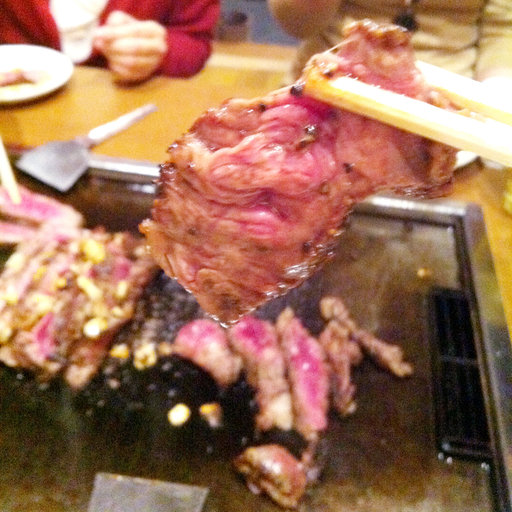

In [5]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image ehgiht: {img.height}")
print(f"Image width: {img.width}")
img

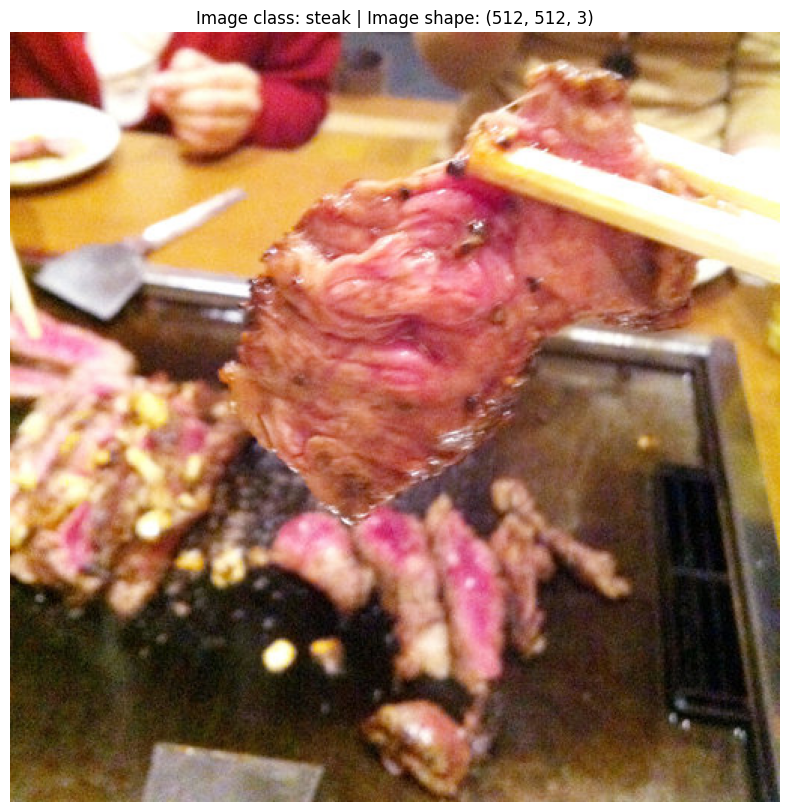

In [6]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 10))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape}")
plt.axis(False);

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [9]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [10]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

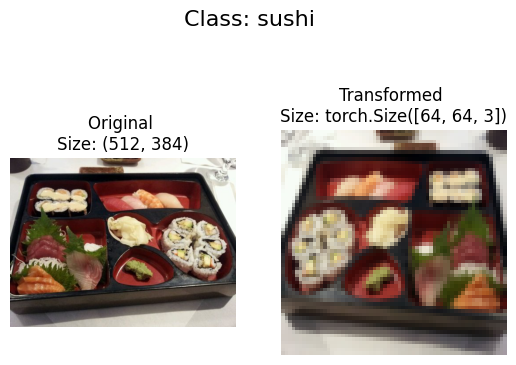

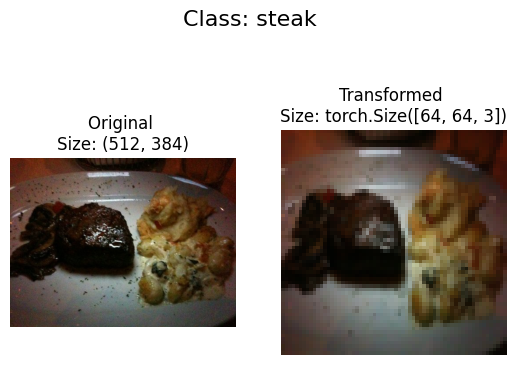

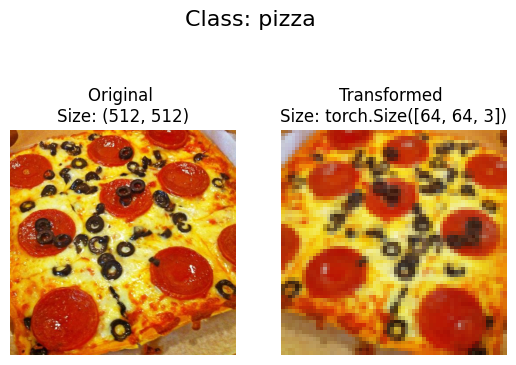

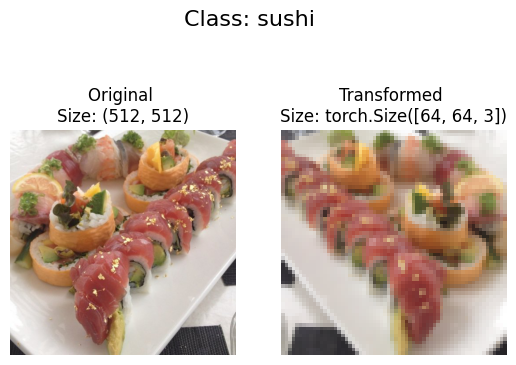

In [11]:
plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=4)

In [12]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

In [13]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [14]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
len(train_data), len(test_data)

(225, 75)

In [16]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS)

## 3. Recreate model_0 we built in section 7.

In [17]:
class TinyVGG(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_1(x)
        # print(x.shape)
        x = self.conv_2(x)
        # print(x.shape)
        x = self.linear(x)
        # print(x.shape)
        return x

In [18]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

## 4. Create training and testing functions for model_0

In [19]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    train_loss, train_acc = 0, 0
    
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred_logits = model(X)
        y_pred_prob = torch.softmax(y_pred_logits, dim=1)
        y_pred = torch.argmax(y_pred_prob, dim=1)

        optimizer.zero_grad()
        loss = loss_fn(y_pred_logits, y)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        acc = (y_pred==y).sum().item()/len(y_pred_logits)
        train_acc += acc
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    return train_loss, train_acc

In [20]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            test_pred_probs = torch.softmax(test_pred_logits, dim=1)
            test_pred = torch.argmax(test_pred_probs, dim=1)

            test_loss += loss_fn(test_pred_logits, y).item()
            test_acc += (test_pred==y).sum().item()/len(test_pred_logits)
        
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          epochs: int):
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)
        
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?

- Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

In [23]:
model_0_results = train(model_0, train_dataloader, test_dataloader, loss_fn, optimizer, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1023 | Train acc: 0.3633 | Test loss: 1.0720 | Test acc: 0.5417
Epoch: 1 | Train loss: 1.1181 | Train acc: 0.2812 | Test loss: 1.0640 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0939 | Train acc: 0.3047 | Test loss: 1.0927 | Test acc: 0.4223
Epoch: 3 | Train loss: 1.0990 | Train acc: 0.4297 | Test loss: 1.0884 | Test acc: 0.5739
Epoch: 4 | Train loss: 1.0834 | Train acc: 0.5469 | Test loss: 1.0916 | Test acc: 0.3532
Epoch: 5 | Train loss: 1.0618 | Train acc: 0.5195 | Test loss: 1.0985 | Test acc: 0.2604
Epoch: 6 | Train loss: 1.0599 | Train acc: 0.3555 | Test loss: 1.0929 | Test acc: 0.2812
Epoch: 7 | Train loss: 1.0256 | Train acc: 0.4688 | Test loss: 1.0252 | Test acc: 0.4432
Epoch: 8 | Train loss: 0.9847 | Train acc: 0.4570 | Test loss: 0.9494 | Test acc: 0.6042
Epoch: 9 | Train loss: 0.9240 | Train acc: 0.5781 | Test loss: 0.9990 | Test acc: 0.4119
Epoch: 10 | Train loss: 0.7852 | Train acc: 0.6406 | Test loss: 1.1135 | Test acc: 0.3324
Epoch: 11 | Train lo

In [31]:
def plot_loss_curves(results):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

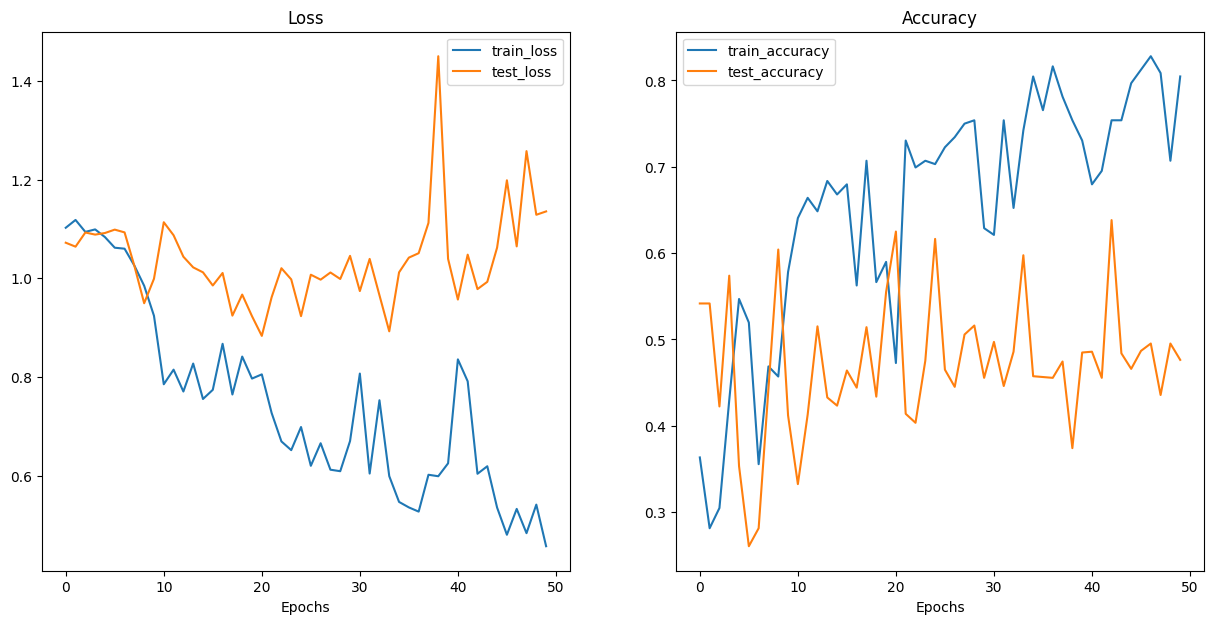

In [32]:
plot_loss_curves(model_0_results)

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [24]:
model_1 = TinyVGG(3, 20, len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3380, out_features=3, bias=True)
  )
)

In [25]:
model_1_results = train(model_1, train_dataloader, test_dataloader, loss_fn, optimizer, epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1010 | Train acc: 0.2812 | Test loss: 1.0876 | Test acc: 0.5417
Epoch: 1 | Train loss: 1.1009 | Train acc: 0.2812 | Test loss: 1.0876 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.1005 | Train acc: 0.2812 | Test loss: 1.0874 | Test acc: 0.5417
Epoch: 3 | Train loss: 1.1008 | Train acc: 0.2812 | Test loss: 1.0875 | Test acc: 0.5417
Epoch: 4 | Train loss: 1.0954 | Train acc: 0.4023 | Test loss: 1.0876 | Test acc: 0.5417
Epoch: 5 | Train loss: 1.1003 | Train acc: 0.2812 | Test loss: 1.0874 | Test acc: 0.5417
Epoch: 6 | Train loss: 1.0999 | Train acc: 0.2812 | Test loss: 1.0874 | Test acc: 0.5417
Epoch: 7 | Train loss: 1.1031 | Train acc: 0.2812 | Test loss: 1.0875 | Test acc: 0.5417
Epoch: 8 | Train loss: 1.1000 | Train acc: 0.2812 | Test loss: 1.0879 | Test acc: 0.5417
Epoch: 9 | Train loss: 1.1002 | Train acc: 0.2812 | Test loss: 1.0872 | Test acc: 0.5417
Epoch: 10 | Train loss: 1.1007 | Train acc: 0.2812 | Test loss: 1.0878 | Test acc: 0.5417
Epoch: 11 | Train lo

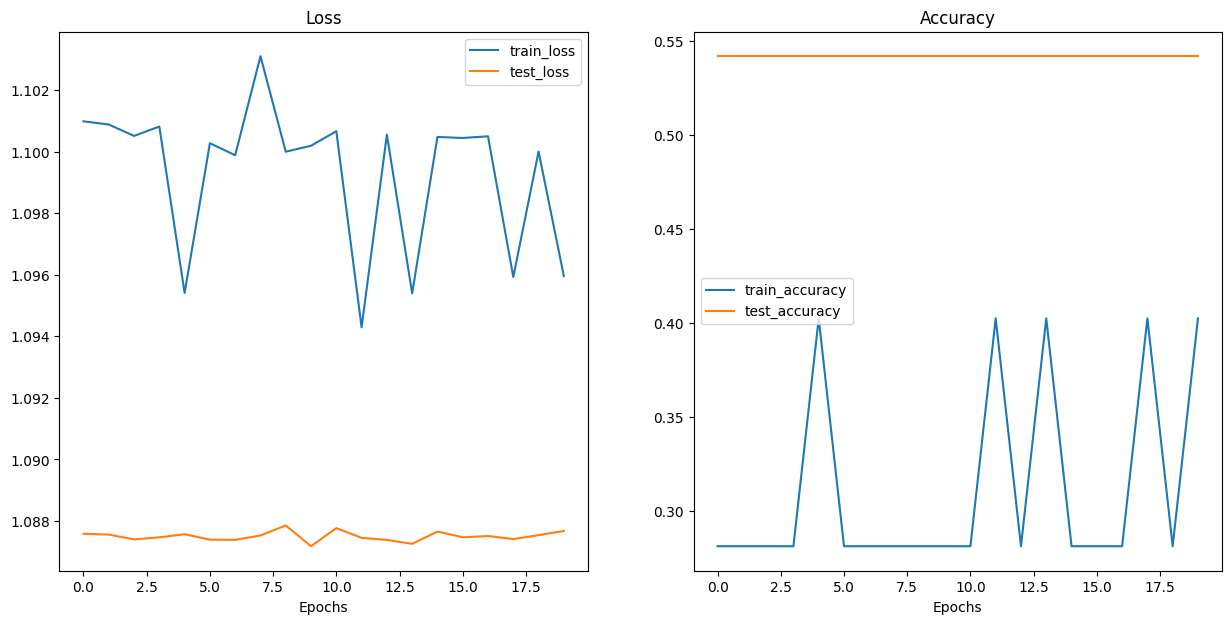

In [33]:
plot_loss_curves(model_1_results)

## 7. Double the data you're using with your model and train it for 20 epochs, what happens to the results?

- Note: You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
- You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [34]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"Did not find {image_path} directory, creating one")
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
        print("Downloading file")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
        print("Unzipping file")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one
Unzipping file


In [35]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi_20_percent 
There are 3 directories and 0 images in data/pizza_steak_sushi_20_percent/train 
There are 0 directories and 154 images in data/pizza_steak_sushi_20_percent/train/pizza 
There are 0 directories and 146 images in data/pizza_steak_sushi_20_percent/train/steak 
There are 0 directories and 150 images in data/pizza_steak_sushi_20_percent/train/sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi_20_percent/test 
There are 0 directories and 46 images in data/pizza_steak_sushi_20_percent/test/pizza 
There are 0 directories and 58 images in data/pizza_steak_sushi_20_percent/test/steak 
There are 0 directories and 46 images in data/pizza_steak_sushi_20_percent/test/sushi 


In [38]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [39]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
print(f"Train data:\n{train_data} \n Test data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 450
    Root location: data/pizza_steak_sushi_20_percent/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) 
 Test data:
Dataset ImageFolder
    Number of datapoints: 150
    Root location: data/pizza_steak_sushi_20_percent/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [40]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)
test_datloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS)

In [41]:
model_2 = TinyVGG(3, 10, len(train_data.classes)).to(device)
model_2

TinyVGG(
  (conv_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [42]:
model_2_results = train(model_2, train_dataloader, test_dataloader, loss_fn, optimizer, 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0994 | Train acc: 0.3208 | Test loss: 1.0974 | Test acc: 0.2604
Epoch: 1 | Train loss: 1.0982 | Train acc: 0.3521 | Test loss: 1.0974 | Test acc: 0.2604
Epoch: 2 | Train loss: 1.0970 | Train acc: 0.3833 | Test loss: 1.0973 | Test acc: 0.2604
Epoch: 3 | Train loss: 1.0995 | Train acc: 0.3208 | Test loss: 1.0975 | Test acc: 0.2604
Epoch: 4 | Train loss: 1.0995 | Train acc: 0.3208 | Test loss: 1.0974 | Test acc: 0.2604
Epoch: 5 | Train loss: 1.0982 | Train acc: 0.3208 | Test loss: 1.0974 | Test acc: 0.2604
Epoch: 6 | Train loss: 1.0977 | Train acc: 0.3521 | Test loss: 1.0974 | Test acc: 0.2604
Epoch: 7 | Train loss: 1.0983 | Train acc: 0.3521 | Test loss: 1.0974 | Test acc: 0.2604
Epoch: 8 | Train loss: 1.0970 | Train acc: 0.3833 | Test loss: 1.0975 | Test acc: 0.2604
Epoch: 9 | Train loss: 1.0989 | Train acc: 0.3208 | Test loss: 1.0974 | Test acc: 0.2604
Epoch: 10 | Train loss: 1.0969 | Train acc: 0.3833 | Test loss: 1.0973 | Test acc: 0.2604
Epoch: 11 | Train lo

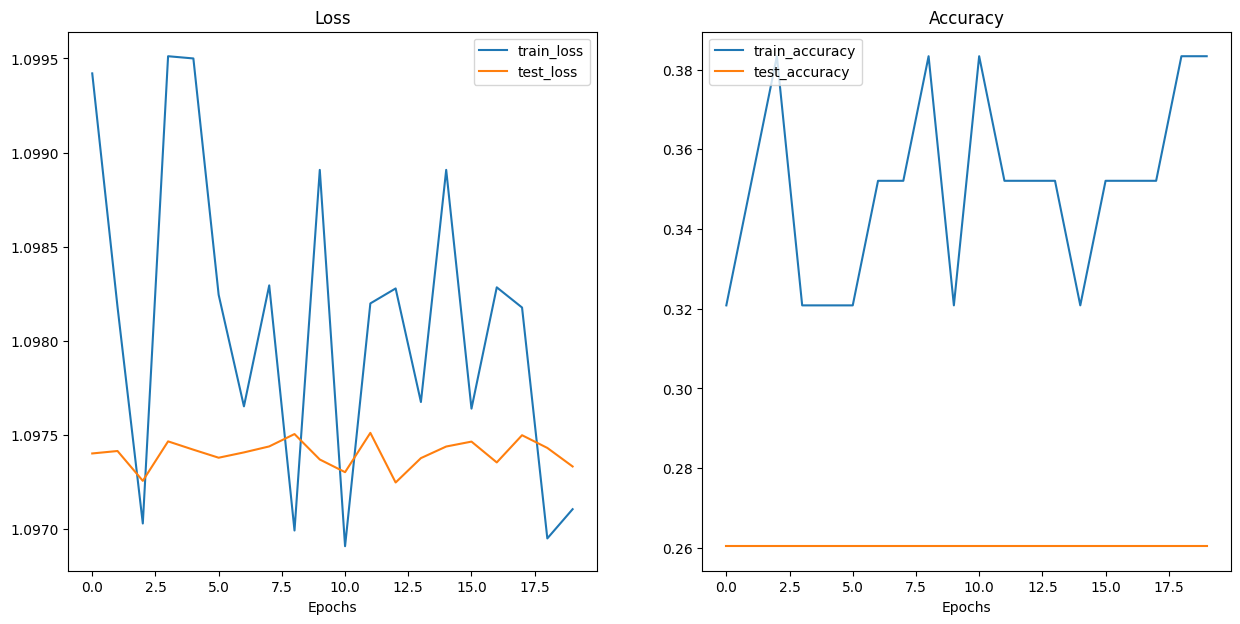

In [43]:
plot_loss_curves(model_2_results)

### 7.1 Double the number of hiddens units and train for 20 epochs

In [44]:
model_3 = TinyVGG(3, 20, len(train_data.classes)).to(device)
model_3

TinyVGG(
  (conv_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3380, out_features=3, bias=True)
  )
)

In [45]:
model_3_results = train(model_3, train_dataloader, test_dataloader, loss_fn, optimizer, 20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0983 | Train acc: 0.3438 | Test loss: 1.0906 | Test acc: 0.5417
Epoch: 1 | Train loss: 1.0996 | Train acc: 0.3125 | Test loss: 1.0905 | Test acc: 0.5417
Epoch: 2 | Train loss: 1.0984 | Train acc: 0.3438 | Test loss: 1.0906 | Test acc: 0.5417
Epoch: 3 | Train loss: 1.0984 | Train acc: 0.3438 | Test loss: 1.0906 | Test acc: 0.5417
Epoch: 4 | Train loss: 1.0996 | Train acc: 0.3125 | Test loss: 1.0907 | Test acc: 0.5417
Epoch: 5 | Train loss: 1.0986 | Train acc: 0.3438 | Test loss: 1.0907 | Test acc: 0.5417
Epoch: 6 | Train loss: 1.0996 | Train acc: 0.3125 | Test loss: 1.0907 | Test acc: 0.5417
Epoch: 7 | Train loss: 1.0997 | Train acc: 0.3125 | Test loss: 1.0904 | Test acc: 0.5417
Epoch: 8 | Train loss: 1.0995 | Train acc: 0.3125 | Test loss: 1.0904 | Test acc: 0.5417
Epoch: 9 | Train loss: 1.0994 | Train acc: 0.3125 | Test loss: 1.0907 | Test acc: 0.5417
Epoch: 10 | Train loss: 1.0996 | Train acc: 0.3125 | Test loss: 1.0905 | Test acc: 0.5417
Epoch: 11 | Train lo

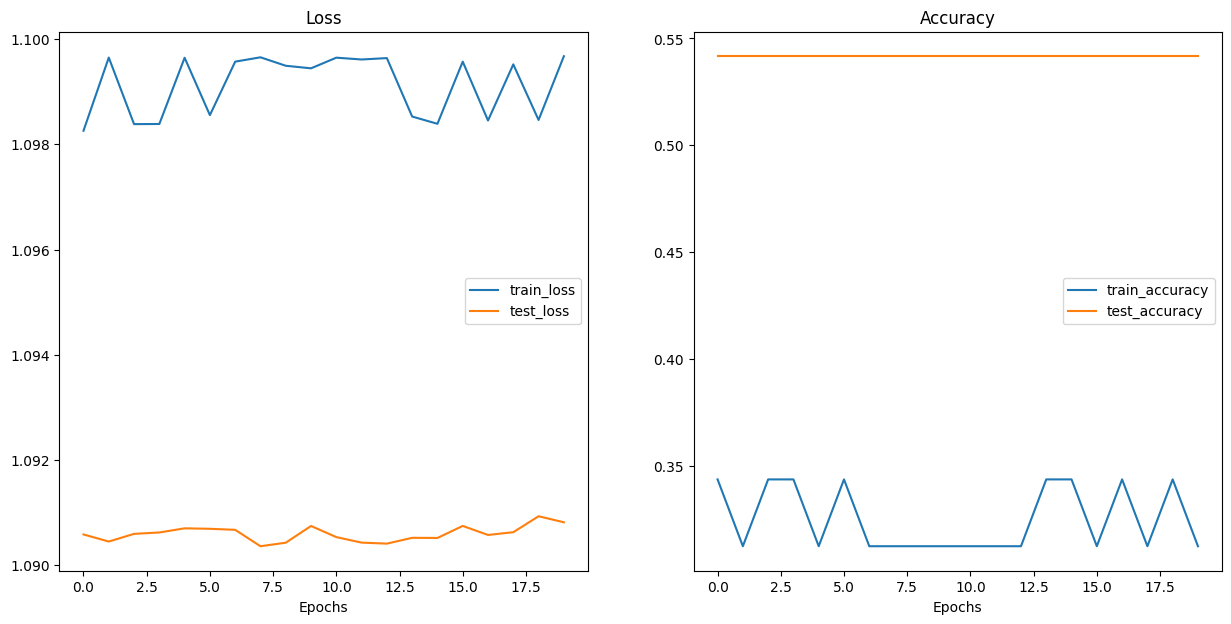

In [46]:
plot_loss_curves(model_3_results)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction.

- Does the model you trained in exercise 7 get it right?
- If not, what do you think you could do to improve it?